<a href="https://colab.research.google.com/github/siddhanthole74/House-Price-Prediction-using-Machine-Learning/blob/main/Project4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement : House Price Prediction using Machine Learning with Python**


1.  The dataset represents the aggrigate information about 14 features of from 
    various suburbs located in boston




In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plt and sns are used for graph ploting 
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_openml

Importing the boston house dataset 

In [2]:

house_price_dataset = fetch_openml(name='boston', version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(house_price_dataset)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [4]:
#loading the dataset to pandas data frame
house_price_dataframe=pd.DataFrame(house_price_dataset.data);

In [5]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [6]:
# add the target (price) column to the DataFrame
house_price_dataframe['Price']=house_price_dataset.target

In [7]:
house_price_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [9]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [10]:
# statistical measures of the dataset required for if null value is missing then we can replaced that NUll value in that particular column by mean value and if categorical value is missing then we can replace it by mode value 
house_price_dataframe.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset 

**correlation **

Correlation is a statistical measure that describes the strength and direction of the relationship between two variables. In the context of machine learning, correlation is used to identify the extent to which two or more variables are related, and can be an important tool for feature selection and data analysis.

Correlation can be measured using a statistical technique called correlation analysis, which involves calculating a correlation coefficient. The correlation coefficient is a number between -1 and 1, with -1 indicating a perfect negative correlation (as one variable increases, the other decreases), 1 indicating a perfect positive correlation (as one variable increases, so does the other), and 0 indicating no correlation at all.

In machine learning, correlation analysis can be used to identify which features in a dataset are most strongly related to the target variable. This can help to guide feature selection and data preprocessing, and can also be used to identify potential multicollinearity (high correlation between features), which can cause problems in some machine learning algorithms

the correlation between variable by using heat map



In [11]:
correlation=house_price_dataframe.corr()

<ipython-input-11-dc42b09ab0de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=house_price_dataframe.corr()


Spilting data and target 

In [12]:
X=house_price_dataframe.drop(['Price'],axis=1) # if we droping the column then mention axis =1
Y=house_price_dataframe['Price']

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [14]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [25]:
print(X.shape,X_train.shape,Y_train.shape)

(506, 13) (404, 13) (404,)


In [16]:
X.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [17]:
# convert the categorical columns to int dtype
X['CHAS'] = X['CHAS'].astype(int)
X['RAD'] = X['RAD'].astype(int)

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1) #It is important to note that the value of random_state does not affect the actual training of the model. It only affects the split of the dataset into training and testing sets.

**Model Training **

In [19]:
#loading the model
model=XGBRegressor()

In [20]:
#training the model with X train and Y train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Model Evaluation

In [21]:
#training  data prediction
training_data_prediction=model.predict(X_train)

In [22]:
print(training_data_prediction)

[25.245571  23.32921    7.210682  21.154896  11.702352  26.999006
 29.584614  26.544731  43.50524   23.625568  11.002917  33.40945
 36.007214  36.40028   19.037712  20.18499   34.905746  49.99532
 19.321676  14.898901  26.617535  19.894657  24.802687  21.180086
 23.923895  20.586973  23.074522  27.950964  19.987543  23.094906
 25.010534   9.705043  23.892748  36.09172   13.418543  12.731809
 39.79168   10.393237  20.598629  17.775103  19.482315  23.710855
 28.513987  24.29506   23.771362  19.072584  28.377209  20.49642
 33.825535  14.507262  20.39619   16.009405  13.304443  30.793392
 27.49651   24.428276  24.389343  25.122246  43.8164    21.898586
 26.22088   14.255268  20.789656  20.105751  23.099632  13.068087
 16.195873  24.834087  20.208426  22.484184  14.791592  28.696594
 20.114979  23.412987  31.992868  19.124737  49.992138  20.895212
 21.69236   21.999992  17.206669  30.303902  12.287807  21.39682
 20.501791  35.200222  19.602581  22.003605  21.689674  14.086667
 21.088537  15

In [23]:
# r_squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)
print("R square value :",score_1)

R square value : 0.9999952977725205


In [24]:
#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error :",score_2)

R squared error : 0.01375658535721277


Here the values are pretty small that means our model is performing good

In [26]:
# testing data prediction 
testing_data_prediction=model.predict(X_test)


In [27]:
print(testing_data_prediction)

[30.359884 27.026636 19.17616  21.448114 20.703493 20.424747 27.9036
 17.878405 21.678137 23.36513  25.411674 33.19199  21.495481 19.939993
 19.990822 28.529932 13.219593 44.483154 25.460302 11.562899 19.486588
 17.153116 24.325785 23.509218 27.791344  8.616411 14.683976 19.01615
 45.651524 12.10203  22.976582 17.523937 48.34446  16.573458 24.024517
 21.818398 14.679352 35.878193 16.073364 20.764208 25.262817 22.376215
 24.78839  14.799538 16.877083 11.262062 46.995094 11.280138 21.217411
 18.637756 23.77302  20.691387 25.980684 20.501291  8.173699 22.731295
 11.759897 24.526464 18.271172 38.32712  12.570583 25.870787 12.011916
 13.295293 17.679295 35.901722 37.55958  23.164257 20.201231 20.955679
 24.68425   7.049963 18.19561  19.824377 19.77468  20.867382 40.98662
 24.473787 27.369884 31.096327 16.441713 19.326612 36.752098  9.891363
 20.98247  25.28127  14.024525 26.155094 21.51227  16.4159   23.28247
 45.429245 15.133404 20.947332 14.996857 20.791437 24.775454 23.958286
 45.176277 

In [28]:
print(Y_test)

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
92     22.9
224    44.8
110    21.7
426    10.2
443    15.4
Name: Price, Length: 102, dtype: float64


In [29]:
score_1=metrics.r2_score(Y_test,testing_data_prediction)

In [30]:
print("R score value of testing data :",score_1)

R score value of testing data : 0.9085331557145866


In [32]:
#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,testing_data_prediction)

In [33]:
print("Mean absolute error of testing data :",score_2)

Mean absolute error of testing data : 2.344013180452235


Visualization between actual value and predicted value 

Visualizing actual data and predicted data can help you better understand your model's performance and gain insights into your data. Here are some of the benefits of visualizing actual and predicted data:

Model evaluation: Visualization can help you evaluate your model's performance by comparing actual and predicted data. You can plot the actual and predicted data on a graph and visually inspect the differences between them. This can help you identify patterns in the data and identify areas where your model is performing well or needs improvement.

Model debugging: Visualizing the actual and predicted data can help you debug your model by identifying areas where it is making errors. For example, if your model consistently underestimates or overestimates a particular variable, you can investigate why this is happening and adjust your model accordingly.

Communicating results: Visualization can help you communicate your model's results to others in a more effective way. A graph that shows the actual and predicted data can be easier to understand than a table of numbers, especially for non-technical stakeholders.

Feature importance: Visualization can help you identify which features are most important for your model's performance. You can plot the feature importance scores on a graph and see which features have the biggest impact on the model's predictions.

In summary, visualizing actual and predicted data can help you evaluate, debug, and communicate your model's results, as well as gain insights into your data.

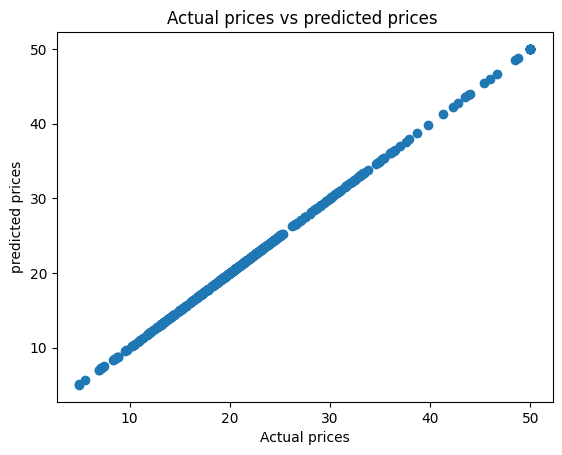

In [35]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("Actual prices vs predicted prices ")
plt.show()

Text(0.5, 1.0, 'actual value vs predicted value')

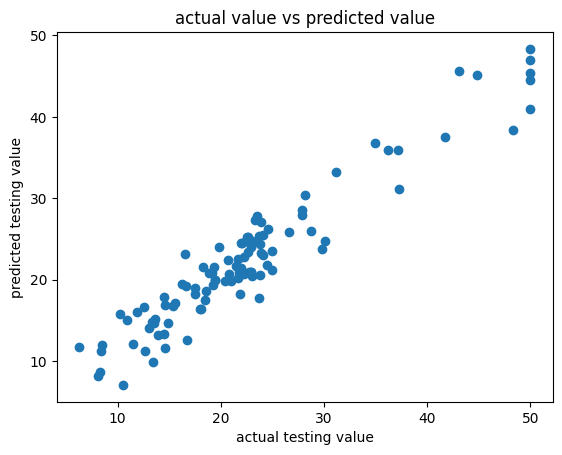

In [36]:
# visualization of testing data
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("actual testing value")
plt.ylabel("predicted testing value")
plt.title("actual value vs predicted value")